# Problem Set #8

MACS 30000, Dr. Evans

Haihao Guo

## Exercise 1

#### A

In [15]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

biden = pd.read_csv('biden.csv')
y = biden['biden'].values
X = biden[['female', 'age', 'dem', 'rep', 'educ']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,
                                                    random_state=25)
bid_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
bid_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

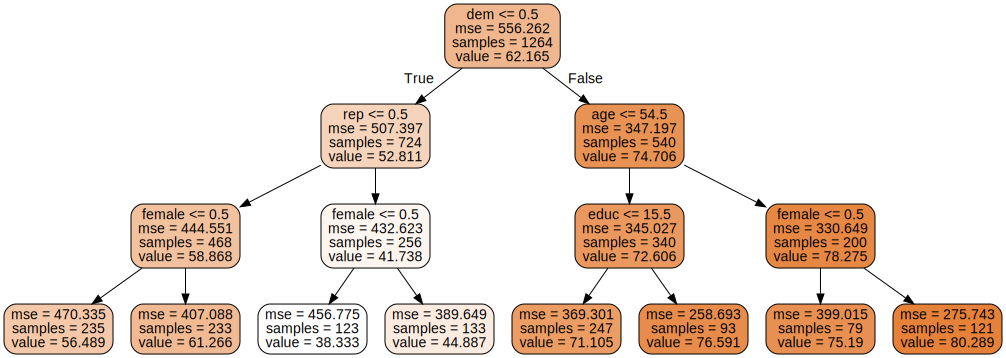

In [16]:
from sklearn.tree import export_graphviz
import graphviz

bid_tree_viz = export_graphviz(
    bid_tree,
    out_file=None,
    feature_names=["female","age","dem","rep", "educ"],
    class_names=biden.biden,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(bid_tree_viz)
graph.render('bid_tree_viz')
graph

Interptretation of the result:
1. Decision tree splits the predictors into eight terminals. The procedure of dividing is clearly shown in the graph above. 
2. The first node is dem. Then the left branch is splited by rep and right branch is splited by age. The four nodes in the third level are further divided by feamle, female, educ and female. 
3. The mse of test set is 396.19 overall. The most accurate estimation is the type with dem = 1, age <= 54.5, educ <=15.5.

In [6]:
y_pred = bid_tree.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('test MSE=', MSE1)

test MSE= 396.1937146321307


The test MSE is 396.1937146321307

## Exercise 2

#### B

In [7]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

param_dist1 = {'max_depth': [3, 10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20)}
RSCV = RandomizedSearchCV(DecisionTreeRegressor(), param_dist1, 
                        n_iter=100, n_jobs=-1, cv=5, random_state=25, \
                          scoring='neg_mean_squared_error')

print("The results for the training data:")
bid_tree2 = RSCV.fit(X_train, y_train)
print('Optimal tuning parameter values:', bid_tree2.best_params_)
print('MSE of the optimal results:', abs(bid_tree2.best_score_))
print("\nThe results for the whole dataset:")
bid_tree2 = RSCV.fit(X, y)
print('Optimal tuning parameter values:', bid_tree2.best_params_)
print('MSE of the optimal results:', abs(bid_tree2.best_score_))

The results for the training data:
Optimal tuning parameter values: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 9}
MSE of the optimal results: 404.70994082761746

The results for the whole dataset:
Optimal tuning parameter values: {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
MSE of the optimal results: 401.713307249986


#### C

In [8]:
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
rfr_gen = RandomForestRegressor(random_state=25)
param_dist2 = {'n_estimators': [10, 200],
               'max_depth': [3, 10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 5)}
RSCV2 = RandomizedSearchCV(rfr_gen, param_dist2, 
                         n_iter=100, n_jobs=-1, cv=5, random_state=25, \
                           scoring='neg_mean_squared_error')

print("The results for the training data:")
bid_rf = RSCV2.fit(X_train, y_train)
print('Optimal tuning parameter values:\n', bid_rf.best_params_)
print('MSE of the optimal results:', abs(bid_rf.best_score_))
print("\nThe results for the whole dataset:")
bid_rf2 = RSCV2.fit(X, y)
print('Optimal tuning parameter values:\n', bid_rf2.best_params_)
print('MSE of the optimal results:', abs(bid_rf2.best_score_))

The results for the training data:
Optimal tuning parameter values:
 {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 19, 'min_samples_split': 2, 'n_estimators': 200}
MSE of the optimal results: 398.20140081158166

The results for the whole dataset:
Optimal tuning parameter values:
 {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 19, 'min_samples_split': 2, 'n_estimators': 200}
MSE of the optimal results: 397.28520401830787


#### A

In [9]:
df1 = pd.read_csv('Auto.csv',na_values="?")
df1.dropna(inplace=True)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [10]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

tf = df1['mpg']>=df1['mpg'].median()
df1['mpg_high'] = np.where(tf,1,0)
oritf1 = df1['origin']==1
df1['orgn1'] = np.where(oritf1,1,0)
oritf2 = df1['origin']==2
df1['orgn2'] = np.where(oritf2,1,0)
Xvars = df1[['cylinders', 'displacement', 'horsepower', \
         'weight','acceleration', 'year', 'orgn1', 'orgn2']].values
yvars = df1['mpg_high'].values

kf_log = KFold(n_splits=4, shuffle=True, random_state=25)
kf_log.get_n_splits(Xvars)
err_vec1 = np.zeros(4)
err_vec0 = np.zeros(4)
MSE_vec_kf = np.zeros(4)
k_ind = int(0)

for train_index, test_index in kf_log.split(Xvars):
    
    print('k index=', k_ind)
    
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    
    err_1_pred = np.sum((y_test!=y_pred)&(y_test == 1)) \
    /np.sum(y_test == 1)
    err_0_pred = np.sum((y_test!=y_pred)&(y_test == 0)) \
    /np.sum(y_test == 0)
    err_vec1[k_ind] = err_1_pred
    err_vec0[k_ind] = err_0_pred
    MSE_vec_kf[k_ind] = (y_test != y_pred).mean()
    
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    print('error rate for mpg_high = 1 of test set', \
          k_ind, ' is', err_1_pred)
    print('error rate for mpg_high = 0 of test set', \
          k_ind, ' is', err_0_pred,"\n")
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
err_1 = err_vec1.mean()
err_0 = err_vec0.mean()
print('The estimate MSE loocv of the test =', MSE_kf)
print('Overall error rate for mpg_high = 1 is', err_1)
print('Overall error rate for mpg_high = 0 is', err_0)

k index= 0
MSE for test set 0  is 0.14285714285714285
error rate for mpg_high = 1 of test set 0  is 0.12727272727272726
error rate for mpg_high = 0 of test set 0  is 0.16279069767441862 

k index= 1
MSE for test set 1  is 0.09183673469387756
error rate for mpg_high = 1 of test set 1  is 0.07317073170731707
error rate for mpg_high = 0 of test set 1  is 0.10526315789473684 

k index= 2
MSE for test set 2  is 0.07142857142857142
error rate for mpg_high = 1 of test set 2  is 0.043478260869565216
error rate for mpg_high = 0 of test set 2  is 0.09615384615384616 

k index= 3
MSE for test set 3  is 0.08163265306122448
error rate for mpg_high = 1 of test set 3  is 0.05555555555555555
error rate for mpg_high = 0 of test set 3  is 0.11363636363636363 

The estimate MSE loocv of the test = 0.09693877551020408
Overall error rate for mpg_high = 1 is 0.07486931885129128
Overall error rate for mpg_high = 0 is 0.11946101633984131


#### B

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc_gen =  RandomForestClassifier(random_state=25)
param_dist3 = {'n_estimators': [10, 200],
               'max_depth': [3, 8],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 8)}

RSCV3 = RandomizedSearchCV(rfc_gen, param_dist3, 
                        n_iter=100, n_jobs=-1, cv=4, random_state=25, \
                           scoring='neg_mean_squared_error')

random_forest = RSCV3.fit(Xvars, yvars)
print('Optimal tuning parameter values:\n', random_forest.best_params_)
print('MSE of the optimal results:', abs(random_forest.best_score_))


Optimal tuning parameter values:
 {'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 10}
MSE of the optimal results: 0.08928571428571429


#### C

In [12]:
from sklearn.svm import SVC
from scipy.stats import uniform as sp_uniform

param_dist4 = {'C': sp_uniform(loc=0.2, scale=4.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}
RSCV4 = RandomizedSearchCV(SVC(kernel='rbf'), param_dist4, 
                                n_iter=100, n_jobs=-1, cv=4, random_state=25, \
                                scoring='neg_mean_squared_error')


random_SVC = RSCV4.fit(Xvars, yvars)
print('Optimal tuning parameter values:\n', random_SVC.best_params_)
print('MSE of the optimal results:', abs(random_SVC.best_score_))

Optimal tuning parameter values:
 {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False}
MSE of the optimal results: 0.11989795918367346


#### D

Random Forest Classifier is the best predictor of mpg_high because this classifier has the lowest MSE of the model.